In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# load the data
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = 10000)


# prepare the data
def vectorize_data(x, dimension=10000):
  result = np.zeros((len(x), dimension))
  for i, word in enumerate(x):
    result[i, word] = 1
  return result

x_train = vectorize_data(X_train)
x_test = vectorize_data(X_test)

y_train = np.asarray(Y_train).astype('float32')
y_test = np.asarray(Y_test).astype('float32')


# partition train data into training set and validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# build the NN
network = models.Sequential()
network.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))


# choose loss function, optimizer, and target metrics
network.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


# train the NN
history = network.fit(partial_x_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data = (x_val, y_val))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.5048 - acc: 0.7872 - val_loss: 0.3775 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2991 - acc: 0.9049 - val_loss: 0.3001 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2173 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1747 - acc: 0.9439 - val_loss: 0.2826 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1422 - acc: 0.9540 - val_loss: 0.2855 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1147 - acc: 0.9651 - val_loss: 0.3141 - val_acc: 0.8779
Ep

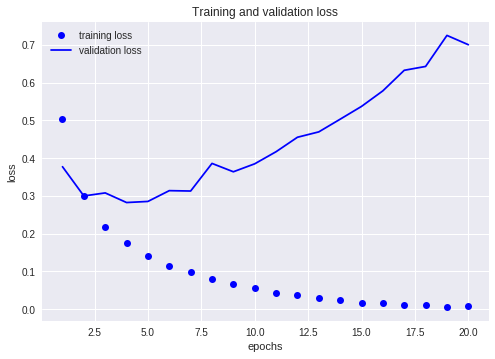

In [2]:
# plotting the training and validation loss

epochs = range(1,21)
plt.plot(epochs, history.history['loss'], 'bo', label = 'training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

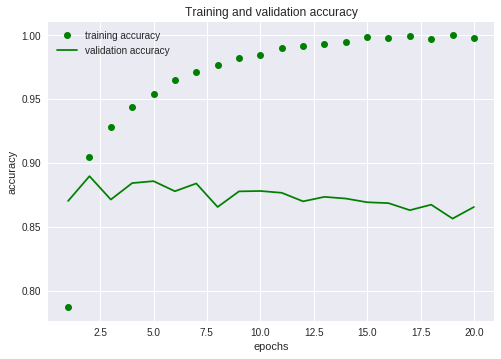

In [3]:
# plotting the training and validation accuracy

epochs = range(1,21)
plt.plot(epochs, history.history['acc'], 'go', label = 'training accuracy')
plt.plot(epochs, history.history['val_acc'], 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [4]:
# NN starts to overfit after about 4 epochs; 
# so we train NN from scratch for 4 epochs and using all training set

network.fit(x_train, y_train, epochs = 4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2192 - acc: 0.9460
Epoch 2/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.1410 - acc: 0.9582
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.1105 - acc: 0.9674
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.0883 - acc: 0.9726


In [5]:
# test the NN

test_loss, test_accuracy = network.evaluate(x_test, y_test)
print('test_loss: ',test_loss)
print('test_accuracy: ', test_accuracy)

25000/25000 [==============================] - 2s 75us/step
test_loss:  0.502628615629673
test_accuracy:  0.85868


In [6]:
# Use the NN for prediction

network.predict(x_test)

array([[0.01737729],
       [0.9999993 ],
       [0.9848728 ],
       ...,
       [0.1761246 ],
       [0.13799521],
       [0.6967368 ]], dtype=float32)